In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import recordingsessions as rs
import numpy as np
import matplotlib.pyplot as plt
import utils
import scipy.signal as signal

In [4]:
%store -r rcs05

In [7]:
rcs05.sessions['july_23'].rcs_df.iloc[0]

localTime                        22-Jul-2021 22:17:54.488
DerivedTime                                 1627017474488
TD_key0                                         -0.254189
TD_key1                                         -0.618494
TD_key2                                         -0.167924
TD_key3                                          0.016775
TD_samplerate                                         NaN
Power_ExternalValuesMask                              0.0
Power_FftSize                                       256.0
Power_IsPowerChannelOverrange                         1.0
Power_ValidDataMask                            11111111.0
Power_Band1                                   149387343.0
Power_Band2                                    21844315.0
Power_Band3                                    42618665.0
Power_Band4                                     6733049.0
Power_Band5                                       33014.0
Power_Band6                                         221.0
Power_Band7   

In [34]:
rcs05 = rs.Patient()


In [35]:

rcs05_july_24A = rs.RecordingSession('/Users/claysmyth/Desktop/Starr/RCS_Hypno_Data/RCS05/7_24_21/Right/Session1627104469000/DeviceNPC700415H/combinedDataTable.csv')
rcs05_july_24B = rs.RecordingSession('/Users/claysmyth/Desktop/Starr/RCS_Hypno_Data/RCS05/7_24_21/Right/Session1627116681392/DeviceNPC700415H/combinedDataTable.csv')


In [37]:
rcs05_july_24A.load_dreem('/Users/claysmyth/Desktop/Starr/RCS_Hypno_Data/DREEM/RCS05/07_24_21/hypnoCleaned.csv')
rcs05_july_24B.load_dreem('/Users/claysmyth/Desktop/Starr/RCS_Hypno_Data/DREEM/RCS05/07_24_21/hypnoCleaned.csv')

rcs05_july_24A.label_rcs_data()
rcs05_july_24B.label_rcs_data()

rcs05_july_24A.drop_Nan('Power_Band1', copy_selected_columns=True, cols_to_save=np.array([1,2,3,4,5,-1]))
rcs05_july_24B.drop_Nan('Power_Band1', copy_selected_columns=True, cols_to_save=np.array([1,2,3,4,5,-1]))

/opt/anaconda3/envs/sleep_class/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/envs/sleep_class/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


To create original rcs_df, recreate RecordingSession object with identical filepath. If flag is true, then original columns, as deemed in cols_to_save, will be copied to parsed_df field for saving.
To create original rcs_df, recreate RecordingSession object with identical filepath. If flag is true, then original columns, as deemed in cols_to_save, will be copied to parsed_df field for saving.


In [38]:
rcs05.add_session('july_24A', rcs05_july_24A, 'right')
rcs05.add_session('july_24B', rcs05_july_24B, 'right')

In [39]:
rcs05_july_23 = rs.RecordingSession('/Users/claysmyth/Desktop/Starr/RCS_Hypno_Data/RCS05/7_23_21/Session1627017373279/DeviceNPC700415H/combinedDataTable.csv')
rcs05_july_23.load_dreem('/Users/claysmyth/Desktop/Starr/RCS_Hypno_Data/DREEM/RCS05/07_23_21/hypnoCleaned.csv')
rcs05_july_23.label_rcs_data()
rcs05_july_23.drop_Nan('Power_Band1', copy_selected_columns=True, cols_to_save=np.array([1,2,3,4,5,-1]))

rcs05.add_session('july_23', rcs05_july_23, 'right')

/opt/anaconda3/envs/sleep_class/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


To create original rcs_df, recreate RecordingSession object with identical filepath. If flag is true, then original columns, as deemed in cols_to_save, will be copied to parsed_df field for saving.


2


ValueError: x and y must have same first dimension, but have shapes (41,) and (0,)

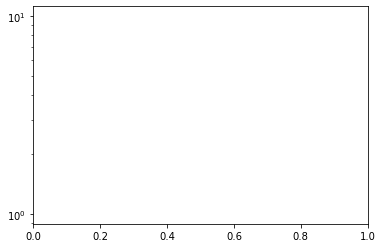

In [61]:

channel = 3

sample_rate = 250

td = rcs05.sessions['july_24B'].parsed_df

periodograms = []

f, Pxx_den = signal.welch(td[f'TD_key{channel}'].iloc[td["SleepStage"].values == 1].dropna(), fs=sample_rate, nperseg=250, noverlap=25)
periodograms.append(Pxx_den)

f, Pxx_den = signal.welch(td[f'TD_key{channel}'].iloc[td["SleepStage"].values == 2].dropna(), fs=sample_rate, nperseg=250, noverlap=25)
periodograms.append(Pxx_den)

# f, Pxx_den = signal.welch(td[f'TD_key{channel}'].iloc[td["SleepStage"].values == 3].dropna(), fs=sample_rate, nperseg=250, noverlap=25)
# periodograms.append(Pxx_den)

# f, Pxx_den = signal.welch(td[f'TD_key{channel}'].iloc[td["SleepStage"].values == 4].dropna(), fs=sample_rate, nperseg=250, noverlap=25)
# periodograms.append(Pxx_den)

plt.semilogy(f[:41], periodograms[0][:41], label='Sleep Stage 1', linewidth=0.5)
plt.semilogy(f[:41], periodograms[1][:41], label='Sleep Stage 2', linewidth=0.5)
#plt.semilogy(f, periodograms[2], label='Sleep Stage 3', linewidth=0.5)
# plt.semilogy(f, periodograms[2], label='Sleep Stage 4', linewidth=0.5)


plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [mV**2/Hz]')
plt.legend()
plt.show()

In [59]:
# TODO: Replicate embedded power calculation offline
